![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

In [2]:
## loading the organic data - this dataset must NOT be changed
cg_organic_control = pd.read_parquet("data/cg_organic_control.parquet").reset_index(drop=True)
cg_organic_control.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
1,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
2,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
3,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
4,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no


In [3]:
rsm.md("data/cg_organic_control_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")


In [4]:
## loading the treatment data - this dataset must NOT be changed
cg_ad_treatment = pd.read_parquet("data/cg_ad_treatment.parquet").reset_index(drop=True)
cg_ad_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
2,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
4,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0


In [5]:
rsm.md("data/cg_ad_treatment_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* rnd_30k: Dummy variable that randomly selects 30K customers (1) and the remaining 90K (0)


In [6]:
cg_ad_random = pd.read_parquet("data/cg_ad_random.parquet").reset_index(drop=True)
cg_ad_random.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,2,8,0,0,0,5,4,no,no,0,0,8,0,yes,no,3,1889,no,yes
1,no,5,15,0,179,0,50,362,yes,no,22,0,4,4,no,no,2,1308,yes,no
2,no,7,7,0,267,0,64,0,no,no,5,0,0,0,no,yes,1,3562,yes,no
3,no,4,4,0,36,0,0,0,no,no,0,0,0,0,no,no,2,2922,yes,no
4,no,8,17,0,222,10,63,20,yes,no,10,0,9,6,yes,no,4,2192,yes,no


In [7]:
rsm.md("data/cg_ad_random_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Uplift Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")

In [8]:
# # show the content of another notebook
# rsm.md_notebook("./sub-notebooks/question1.ipynb")

In [9]:
# # run python code from another notebook
# %run ./sub-notebooks/question1.ipynb

In [10]:
# load a custom python module
from utils.functions import example

example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



# Part I: Uplift Modeling Using Machine Learning

### 1. Prepare the data

#### a) Add a variable “ad” to cg_ad_random and set its value to 1 for all rows

In [11]:
cg_ad_random["ad"] = 1

cg_ad_random

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
1,no,5,15,0,179,0,50,362,yes,no,...,0,4,4,no,no,2,1308,yes,no,1
2,no,7,7,0,267,0,64,0,no,no,...,0,0,0,no,yes,1,3562,yes,no,1
3,no,4,4,0,36,0,0,0,no,no,...,0,0,0,no,no,2,2922,yes,no,1
4,no,8,17,0,222,10,63,20,yes,no,...,0,9,6,yes,no,4,2192,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,5,1,0,0,0,0,0,no,no,...,0,0,0,yes,yes,11,2374,no,no,1
29996,no,9,12,0,78,0,59,1,yes,no,...,0,0,5,yes,no,2,1978,yes,no,1
29997,no,9,19,1,271,0,71,95,yes,no,...,0,0,3,no,no,2,2831,yes,yes,1
29998,no,10,23,0,76,6,20,107,no,no,...,0,1,0,no,no,9,3197,yes,no,1


#### b) Add a variable “ad” to cg_organic_control and set its value to 0 for all rows

In [12]:
cg_organic_control["ad"] = 0
cg_organic_control

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,7,18,0,124,0,81,0,yes,no,...,0,0,4,no,yes,3,2101,no,no,0
1,no,10,3,2,60,0,18,479,no,no,...,7,0,0,yes,no,7,1644,yes,no,0
2,no,2,1,0,0,0,0,0,no,no,...,0,0,2,no,no,8,3197,yes,yes,0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,0,yes,no,6,913,no,no,0
4,no,8,15,0,0,0,6,51,yes,no,...,0,2,1,yes,no,21,2009,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,10,2,0,14,0,105,0,no,no,...,0,0,0,no,no,11,2192,no,no,0
29996,no,9,7,0,163,2,83,5,no,no,...,0,0,0,yes,no,11,3743,yes,no,0
29997,no,10,15,0,1,1,59,9,no,no,...,0,0,0,yes,no,22,1858,yes,yes,0
29998,no,8,11,0,31,0,0,276,no,no,...,0,0,0,yes,no,19,1797,no,no,0


#### c) Create a stacked dataset for the uplift analysis by combining cg_organic_control (Group 1) and cg_ad_random (Group 2). Use cg_rct_stacked as the name for the stacked dataset.

In [13]:
cg_rct_stacked = pd.concat([cg_organic_control, cg_ad_random], ignore_index=True)
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,7,18,0,124,0,81,0,yes,no,...,0,0,4,no,yes,3,2101,no,no,0
1,no,10,3,2,60,0,18,479,no,no,...,7,0,0,yes,no,7,1644,yes,no,0
2,no,2,1,0,0,0,0,0,no,no,...,0,0,2,no,no,8,3197,yes,yes,0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,0,yes,no,6,913,no,no,0
4,no,8,15,0,0,0,6,51,yes,no,...,0,2,1,yes,no,21,2009,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0,0,0,yes,yes,11,2374,no,no,1
59996,no,9,12,0,78,0,59,1,yes,no,...,0,0,5,yes,no,2,1978,yes,no,1
59997,no,9,19,1,271,0,71,95,yes,no,...,0,0,3,no,no,2,2831,yes,yes,1
59998,no,10,23,0,76,6,20,107,no,no,...,0,1,0,no,no,9,3197,yes,no,1


#### d) Create a training variable (70% training and 30% test). Use 1234 as the seed. Use “converted” and “ad” as the blocking variables, in that order.

In [14]:
cg_rct_stacked["training"] = rsm.model.make_train(data=cg_rct_stacked, test_size=0.3, strat_var=["converted", "ad"])

cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training
0,no,7,18,0,124,0,81,0,yes,no,...,0,4,no,yes,3,2101,no,no,0,1.0
1,no,10,3,2,60,0,18,479,no,no,...,0,0,yes,no,7,1644,yes,no,0,1.0
2,no,2,1,0,0,0,0,0,no,no,...,0,2,no,no,8,3197,yes,yes,0,1.0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,yes,no,6,913,no,no,0,0.0
4,no,8,15,0,0,0,6,51,yes,no,...,2,1,yes,no,21,2009,yes,no,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0,0,yes,yes,11,2374,no,no,1,0.0
59996,no,9,12,0,78,0,59,1,yes,no,...,0,5,yes,no,2,1978,yes,no,1,1.0
59997,no,9,19,1,271,0,71,95,yes,no,...,0,3,no,no,2,2831,yes,yes,1,1.0
59998,no,10,23,0,76,6,20,107,no,no,...,1,0,no,no,9,3197,yes,no,1,0.0


In [15]:
cg_rct_stacked.training.value_counts(normalize=True)

training
1.0    0.7
0.0    0.3
Name: proportion, dtype: float64

#### e) Check if the probability of yes/no is similar across the training and test sets for ad == 0 and ad == 1. The response rate does not have to be exactly the same in the ad == 0 and ad == 1 sections of the data. However, within ad == 0, the ratio of yes/no should be very similar for the training and test sets. Similarly, within ad == 1, the ratio of yes/no should be very similar for the training and test set. 

In [16]:
pd.crosstab(cg_rct_stacked.converted, [cg_rct_stacked.ad, cg_rct_stacked.training]).round(2)

ad            0            1       
training    0.0    1.0   0.0    1.0
converted                          
yes         512   1194  1174   2739
no         8488  19806  7826  18261

In [17]:
pd.crosstab(cg_rct_stacked.converted, [cg_rct_stacked.ad, cg_rct_stacked.training], normalize="columns").round(2)

ad            0           1      
training    0.0   1.0   0.0   1.0
converted                        
yes        0.06  0.06  0.13  0.13
no         0.94  0.94  0.87  0.87

## Logistic Regression Model

### 2. Add predictions using the treatment and control models, i.e., pred_control and pred_treatment, to cg_rct_stacked and calculate the uplift score.

In [18]:
cols = [
    "GameLevel",
    "NumGameDays",
    "NumGameDays4Plus",
    "NumInGameMessagesSent",
    "NumSpaceHeroBadges",
    "NumFriendRequestIgnored",
    "NumFriends",
    "AcquiredSpaceship",
    "AcquiredIonWeapon",
    "TimesLostSpaceship",
    "TimesKilled",
    "TimesCaptain",
    "TimesNavigator",
    "PurchasedCoinPackSmall",
    "PurchasedCoinPackLarge",
    "NumAdsClicked",
    "DaysUser",
    "UserConsole",
    "UserHasOldOS",
]

In [19]:
clf_treatment = rsm.model.logistic(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
)
clf_treatment.summary()

Logistic regression (GLM)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.030  -97.0%        -3.52      0.122  -28.987  < .001  ***
AcquiredSpaceship[yes]       1.088    8.8%         0.08      0.049    1.732   0.083    .
AcquiredIonWeapon[yes]       0.917   -8.3%        -0.09      0.164   -0.533   0.594     
PurchasedCoinPackSmall[yes]  1.045    4.5%         0.04      0.046    0.960   

In [20]:
clf_control = rsm.model.logistic(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
)
clf_control.summary()

Logistic regression (GLM)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.006  -99.4%        -5.18      0.193  -26.809  < .001  ***
AcquiredSpaceship[yes]       1.594   59.4%         0.47      0.072    6.472  < .001  ***
AcquiredIonWeapon[yes]       0.860  -14.0%        -0.15      0.267   -0.566   0.571     
PurchasedCoinPackSmall[yes]  1.029    2.9%         0.03      0.069    0.415   

In [21]:
# predictions
cg_rct_stacked["pred_treatment"] = clf_treatment.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control"] = clf_control.predict(cg_rct_stacked)["prediction"]

In [22]:
# uplift score
cg_rct_stacked["uplift_score"] = cg_rct_stacked.pred_treatment - cg_rct_stacked.pred_control

cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training,pred_treatment,pred_control,uplift_score
0,no,7,18,0,124,0,81,0,yes,no,...,yes,3,2101,no,no,0,1.0,0.082031,0.018729,0.063302
1,no,10,3,2,60,0,18,479,no,no,...,no,7,1644,yes,no,0,1.0,0.186298,0.035720,0.150578
2,no,2,1,0,0,0,0,0,no,no,...,no,8,3197,yes,yes,0,1.0,0.047125,0.012379,0.034746
3,no,2,11,1,125,0,73,217,no,no,...,no,6,913,no,no,0,0.0,0.092398,0.010224,0.082174
4,no,8,15,0,0,0,6,51,yes,no,...,no,21,2009,yes,no,0,1.0,0.307346,0.088581,0.218765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,yes,11,2374,no,no,1,0.0,0.115326,0.024719,0.090608
59996,no,9,12,0,78,0,59,1,yes,no,...,no,2,1978,yes,no,1,1.0,0.061149,0.012370,0.048779
59997,no,9,19,1,271,0,71,95,yes,no,...,no,2,2831,yes,yes,1,1.0,0.062747,0.021071,0.041676
59998,no,10,23,0,76,6,20,107,no,no,...,no,9,3197,yes,no,1,0.0,0.140842,0.106917,0.033925


In [23]:
# Sort the data on uplift score from highest to lowest, selecting a few key columns.
(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment", "pred_control", "uplift_score"]]
    .query("training == 0")
    .sort_values("uplift_score", ascending=False)
)

,converted,ad,training,pred_treatment,pred_control,uplift_score
17708,no,0,0.0,0.980868,0.021444,0.959424
16867,no,0,0.0,0.700271,0.008880,0.691391
55710,no,1,0.0,0.796051,0.128002,0.668049
27668,no,0,0.0,0.763933,0.109287,0.654647
30207,no,1,0.0,0.701397,0.068474,0.632923
...,...,...,...,...,...,...
57308,no,1,0.0,0.125744,0.910955,-0.785211
47019,no,1,0.0,0.114816,0.901620,-0.786804
3181,no,0,0.0,0.101766,0.891800,-0.790034
42502,no,1,0.0,0.163282,0.963696,-0.800414


### 3. Calculate the Uplift (%) and Incremental Uplift (%) for the uplift model (use 20 instead of the standard 10 bins) and plot performance metrics. Interpret the plots. 

In [24]:
uplift_tab = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20)
uplift_tab

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score,1,0.05,197,450,70,634,147.315457,1.636838,0.327368
1,uplift_score,2,0.10,309,900,99,1182,233.619289,2.595770,0.195969
2,uplift_score,3,0.15,428,1350,125,1686,327.911032,3.643456,0.212857
3,uplift_score,4,0.20,528,1800,152,2175,402.206897,4.468966,0.167007
4,uplift_score,5,0.25,594,2250,166,2684,454.842027,5.053800,0.119162
5,uplift_score,6,0.30,642,2700,183,3150,485.142857,5.390476,0.070186
6,uplift_score,7,0.35,681,3150,195,3658,513.080372,5.700893,0.063045
7,uplift_score,8,0.40,719,3600,200,4127,544.539133,6.050435,0.073783
8,uplift_score,9,0.45,756,4050,210,4577,570.179594,6.335329,0.060000
9,uplift_score,10,0.50,791,4500,231,5076,586.212766,6.513475,0.035694


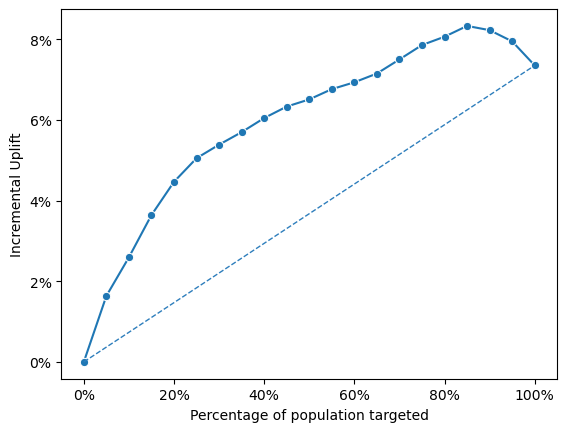

In [25]:
# incremental uplift plot
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20)

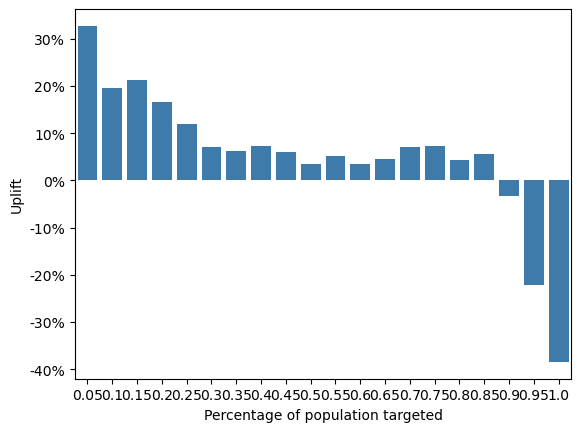

In [26]:
# uplift plot
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score", "ad", 1, qnt = 20)

In [27]:
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad,training,pred_treatment,pred_control,uplift_score
0,no,7,18,0,124,0,81,0,yes,no,...,yes,3,2101,no,no,0,1.0,0.082031,0.018729,0.063302
1,no,10,3,2,60,0,18,479,no,no,...,no,7,1644,yes,no,0,1.0,0.186298,0.035720,0.150578
2,no,2,1,0,0,0,0,0,no,no,...,no,8,3197,yes,yes,0,1.0,0.047125,0.012379,0.034746
3,no,2,11,1,125,0,73,217,no,no,...,no,6,913,no,no,0,0.0,0.092398,0.010224,0.082174
4,no,8,15,0,0,0,6,51,yes,no,...,no,21,2009,yes,no,0,1.0,0.307346,0.088581,0.218765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,yes,11,2374,no,no,1,0.0,0.115326,0.024719,0.090608
59996,no,9,12,0,78,0,59,1,yes,no,...,no,2,1978,yes,no,1,1.0,0.061149,0.012370,0.048779
59997,no,9,19,1,271,0,71,95,yes,no,...,no,2,2831,yes,yes,1,1.0,0.062747,0.021071,0.041676
59998,no,10,23,0,76,6,20,107,no,no,...,no,9,3197,yes,no,1,0.0,0.140842,0.106917,0.033925


**Interpretation:**

The incremental uplift plot visualizes how incremental response rates change as more of the population is targeted. The upward trend in the curve indicates that targeting users with higher uplift scores results in an increase in conversions, peaking around 70-80% of the population. Beyond this point, uplift starts to decline, suggesting that further expansion into lower-scoring users provides diminishing or even negative returns. This insight reinforces the need for a strategic cutoff in targeting, ensuring that marketing efforts remain efficient and impactful.

The uplift plot further supports these findings by illustrating the percentage change in conversion rate across different population segments. The leftmost bars, representing the highest uplift score segments, show a strong positive effect, while the middle segments have a more moderate but still positive uplift. In contrast, the rightmost bars (bottom 20% of users) exhibit negative uplift, indicating that ads may either be unnecessary or ineffective for these individuals. This means that targeting should be focused on the top 30-40% of users with the highest uplift scores, while avoiding the bottom 20% who may not benefit from or may even be negatively impacted by the ads.


### 4. Using the incremental_resp column from the performance metric table created through the uplift_tab function, extrapolate the incremental profit you expect to make if you targeted the best 30,000 customers of 120,000 using the uplift model.

In [28]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_bin5 = uplift_tab.loc[uplift_tab["cum_prop"] == 0.25, "incremental_resp"].values[0]
total_revenue_uplift_logit = incremental_resp_bin5 * rev
total_cost_uplift_logit = sample_target * cost
total_profit_uplift_logit = total_revenue_uplift_logit - total_cost_uplift_logit
profit_scaled_uplift_logit = total_profit_uplift_logit * scaling_factor

profit_scaled_uplift_logit

45907.75976154993

### 5. Calculate the Uplift (%) and Incremental Uplift (%) you would get if you used a  propensity model (use 20 instead of the standard 10 bins). Compare the performance metrics between the uplift and propensity models and interpret the differences.

In [29]:
propensity_tab = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)
propensity_tab

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


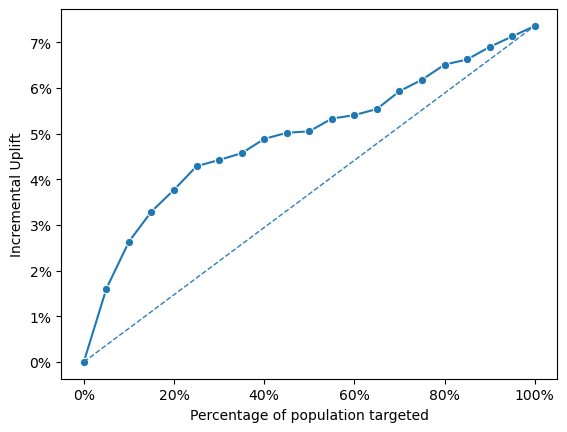

In [30]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)

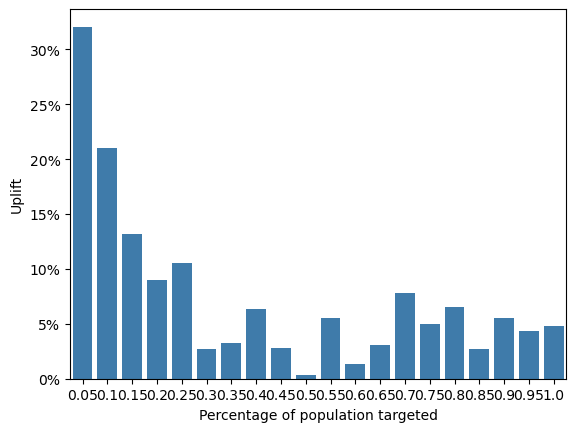

In [31]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)

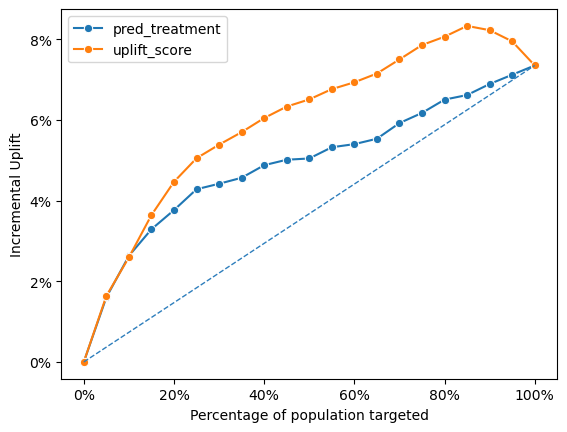

In [32]:
# compare both models with the incremental uplift plot
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
    qnt = 20
)

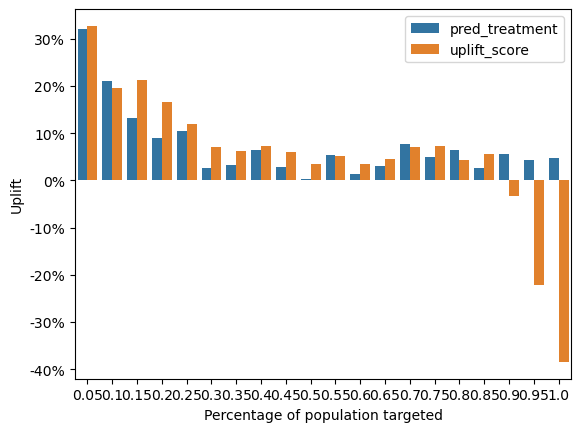

In [33]:
# compare both models with the uplift plot
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
    qnt = 20
)

**Comparison:**

The Incremental Uplift Plot compares predicted treatment probability and uplift score in terms of cumulative incremental uplift as more of the population is targeted. The uplift model (orange line) consistently performs better than the treatment probability model (blue line), meaning it is more effective at identifying customers who are actually influenced by the ad. However, after around 80% of the population is targeted, uplift starts to decline, indicating diminishing returns.

The Uplift Distribution Plot further breaks down uplift percentages by quantile. The top quantiles (left side) show strong positive uplift for both models, but the uplift model is slightly better at capturing higher-value segments. As we move toward the right side (lower quantiles), uplift decreases, and in the bottom bins, the uplift model shows sharp negative uplift, meaning ads to these customers might be counterproductive. The treatment probability model remains more stable but does not differentiate as well between persuadable and non-persuasable users.



### 6. Using the incremental_resp column from the uplift table for the propensity model, extrapolate the incremental profit you would expect to make if you targeted the best 30,000 customers out of of 120,000 using the propensity model. How much more do you expect to make from using an uplift rather than a propensity model?

In [34]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_prop_bin5 = propensity_tab.loc[propensity_tab["cum_prop"] == 0.25, "incremental_resp"].values[0]
total_revenue_prop_logit = incremental_resp_prop_bin5 * rev
total_cost_prop_logit = sample_target * cost
total_profit_prop_logit = total_revenue_prop_logit - total_cost_prop_logit
profit_scaled_prop_logit = total_profit_prop_logit * scaling_factor
profit_diff_logit = profit_scaled_uplift_logit - profit_scaled_prop_logit

print(f"uplift ({profit_scaled_uplift_logit}) - propensity ({profit_scaled_prop_logit}) =", profit_diff_logit)

uplift (45907.75976154993) - propensity (32065.482935153585) = 13842.276826396348


## 7. Neural Network Model

### 2. Add predictions using the treatment and control models, i.e., pred_control and pred_treatment, to cg_rct_stacked and calculate the uplift score.

In [35]:
clf_treatment_nn = rsm.model.mlp(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
    hidden_layer_sizes = (1,),
    alpha = 0.01,
    max_iter = 100_000,
    random_state = 1234
)
clf_treatment_nn.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 20
Nr. of observations  : 21,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.01
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 100000
random_state         : 1234
AUC                  : 0.712

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends 

In [36]:
clf_control_nn = rsm.model.mlp(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
    hidden_layer_sizes = (1,),
    alpha = 0.01,
    max_iter = 100_000,
    random_state = 1234
)
clf_control_nn.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 20
Nr. of observations  : 21,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.01
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 100000
random_state         : 1234
AUC                  : 0.841

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends 

In [37]:
# assign predictions to a new variable
hls = [(i,j) for i in range(1,6) for j in range(1,6)]

# create grid search parameters
param_grid = {
    "hidden_layer_sizes": hls,
    "alpha": np.arange(0, 1.1, 0.1),
}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

In [ ]:
cv_treatment_nn = GridSearchCV( 
    clf_treatment_nn.fitted, 
    param_grid, 
    scoring = {"AUC": "roc_auc"},
    cv= stratified_kfold, 
    n_jobs = 5, 
    refit = "AUC",
    verbose = 5
).fit(clf_treatment_nn.data_onehot, clf_treatment_nn.data.converted)
cv_treatment_nn

## OUTPUT OF THE GRID SEARCH
# MLPClassifier(activation='tanh', alpha=0.9, hidden_layer_sizes=(4, 5),
#              max_iter=100000, random_state=1234, solver='lbfgs')

In [ ]:
cv_control_nn = GridSearchCV( 
    clf_control_nn.fitted, 
    param_grid, 
    scoring = {"AUC": "roc_auc"},
    cv= stratified_kfold, 
    n_jobs = 5, 
    refit = "AUC",
    verbose = 5
).fit(clf_control_nn.data_onehot, clf_control_nn.data.converted)
cv_control_nn

## OUTPUT OF THE GRID SEARCH
# MLPClassifier(activation='tanh', alpha=0.4, hidden_layer_sizes=(3, 4),
#               max_iter=100000, random_state=1234, solver='lbfgs')

In [40]:
clf_treatment_nn = rsm.model.mlp(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
    activation='tanh',
    alpha = 0.9,
    hidden_layer_sizes = (4,5),
    max_iter = 100_000,
    random_state = 1234,
    solver = 'lbfgs',
)

clf_control_nn = rsm.model.mlp(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
    activation='tanh',
    alpha = 0.4,
    hidden_layer_sizes = (3,4),
    max_iter = 100_000,
    random_state = 1234,
    solver = 'lbfgs',
)

clf_treatment_nn.summary()
clf_control_nn.summary()

Multi-layer Perceptron (NN)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 101
Nr. of observations  : 21,000
Hidden_layer_sizes   : (4, 5)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.9
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 100000
random_state         : 1234
AUC                  : 0.799

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriend

In [41]:
# predictions
cg_rct_stacked["pred_treatment_nn"] = clf_treatment_nn.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_nn"] = clf_control_nn.predict(cg_rct_stacked)["prediction"]

In [42]:
# uplift score
cg_rct_stacked["uplift_score_nn"] = cg_rct_stacked.pred_treatment_nn - cg_rct_stacked.pred_control_nn

cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,UserConsole,UserHasOldOS,ad,training,pred_treatment,pred_control,uplift_score,pred_treatment_nn,pred_control_nn,uplift_score_nn
0,no,7,18,0,124,0,81,0,yes,no,...,no,no,0,1.0,0.082031,0.018729,0.063302,0.014465,0.011456,0.003010
1,no,10,3,2,60,0,18,479,no,no,...,yes,no,0,1.0,0.186298,0.035720,0.150578,0.065250,0.009165,0.056085
2,no,2,1,0,0,0,0,0,no,no,...,yes,yes,0,1.0,0.047125,0.012379,0.034746,0.028032,0.001165,0.026867
3,no,2,11,1,125,0,73,217,no,no,...,no,no,0,0.0,0.092398,0.010224,0.082174,0.067739,0.009421,0.058318
4,no,8,15,0,0,0,6,51,yes,no,...,yes,no,0,1.0,0.307346,0.088581,0.218765,0.295513,0.078535,0.216978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,no,no,1,0.0,0.115326,0.024719,0.090608,0.034123,0.004489,0.029634
59996,no,9,12,0,78,0,59,1,yes,no,...,yes,no,1,1.0,0.061149,0.012370,0.048779,0.032198,0.010600,0.021598
59997,no,9,19,1,271,0,71,95,yes,no,...,yes,yes,1,1.0,0.062747,0.021071,0.041676,0.053339,0.013720,0.039618
59998,no,10,23,0,76,6,20,107,no,no,...,yes,no,1,0.0,0.140842,0.106917,0.033925,0.356386,0.130197,0.226189


In [43]:
# Sort the data on uplift score from highest to lowest, selecting a few key columns.
(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment_nn", "pred_control_nn", "uplift_score_nn"]]
    .query("training == 0")
    .sort_values("uplift_score_nn", ascending=False)
)

,converted,ad,training,pred_treatment_nn,pred_control_nn,uplift_score_nn
32783,yes,1,0.0,0.881829,0.085502,0.796327
27546,no,0,0.0,0.905984,0.130472,0.775512
9176,yes,0,0.0,0.891832,0.131999,0.759833
12422,yes,0,0.0,0.830549,0.115802,0.714747
31352,no,1,0.0,0.836111,0.130317,0.705794
...,...,...,...,...,...,...
40077,no,1,0.0,0.096433,0.663996,-0.567564
39450,no,1,0.0,0.088921,0.659981,-0.571061
42060,no,1,0.0,0.087240,0.663045,-0.575806
53516,no,1,0.0,0.075995,0.661325,-0.585330


### 3. Calculate the Uplift (%) and Incremental Uplift (%) for the uplift model (use 20 instead of the standard 10 bins) and plot performance metrics. Interpret the plots.

In [44]:
uplift_tab_nn = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_nn", "ad", 1, qnt = 20)
uplift_tab_nn

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_nn,1,0.05,198,450,74,565,139.061947,1.545133,0.309027
1,uplift_score_nn,2,0.10,354,900,106,1054,263.487666,2.927641,0.281227
2,uplift_score_nn,3,0.15,489,1350,151,1580,359.981013,3.999789,0.214449
3,uplift_score_nn,4,0.20,598,1800,186,2131,440.890662,4.898785,0.178701
4,uplift_score_nn,5,0.25,690,2250,215,2696,510.567507,5.672972,0.153117
5,uplift_score_nn,6,0.30,756,2700,232,3183,559.204524,6.213384,0.111759
6,uplift_score_nn,7,0.35,821,3150,245,3665,610.427012,6.782522,0.117473
7,uplift_score_nn,8,0.40,863,3600,258,4219,642.853046,7.142812,0.069868
8,uplift_score_nn,9,0.45,891,4050,269,4746,661.448799,7.349431,0.041349
9,uplift_score_nn,10,0.50,917,4500,278,5193,676.098787,7.512209,0.037644


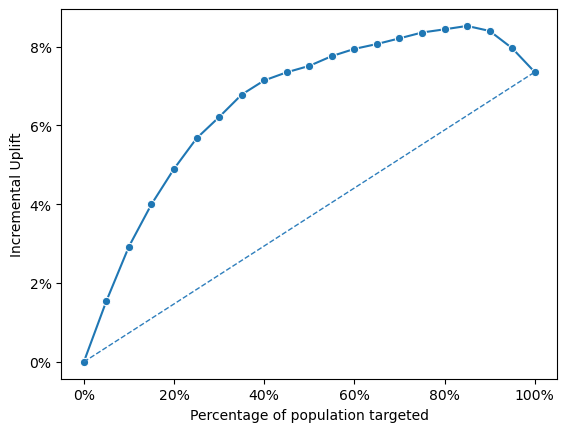

In [45]:
# incremental uplift plot
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_nn", "ad", 1, qnt = 20)

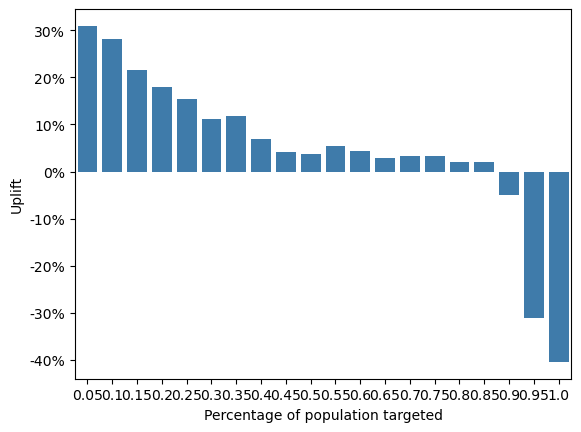

In [46]:
# uplift plot
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_nn", "ad", 1, qnt = 20)

**Interpretation:**

The incremental uplift curve starts low, then steadily increases until it peaks around 80% of the population. After that, the uplift plateaus and starts to decline slightly. This means that targeting beyond this point provides diminishing returns, and any additional spending may not be as effective. The dotted line represents a random baseline, and since the solid curve is above it, the model is performing better than random targeting.

This uplift plot breaks down the percentages across different customer groups. The highest uplift scores are concentrated in the top segments, meaning these customers are the most influenced by the ad. As we move toward the right side (lower-scoring groups), uplift drops significantly, and the last few bins show negative uplift. This suggests that targeting those segments may actually hurt conversions, likely because these users were going to convert anyway or are negatively impacted by ads.

### 4. Using the incremental_resp column from the performance metric table created through the uplift_tab function, and extrapolate the incremental profit you expect to make if you targeted the best 30,000 customers of 120,000 using the uplift model. 

In [47]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_uplift_bin5_nn = uplift_tab_nn.loc[uplift_tab_nn["cum_prop"] == 0.25, "incremental_resp"].values[0]
total_revenue_uplift_nn = incremental_resp_uplift_bin5_nn * rev
total_cost_uplift_nn = sample_target * cost
total_profit_uplift_nn = total_revenue_uplift_nn - total_cost_uplift_nn
profit_scaled_uplift_nn = total_profit_uplift_nn * scaling_factor

profit_scaled_uplift_nn

57045.425816023744

### 5. Calculate the Uplift (%) and Incremental Uplift (%) you would get if you used a propensity model (use 20 instead of the standard 10 bins). Compare the performance metrics between the uplift and propensity models and interpret the differences.

In [48]:
propensity_tab_nn = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_nn", "ad", 1, qnt = 20)
propensity_tab_nn

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_nn,1,0.05,210,450,76,563,149.253996,1.658378,0.331676
1,pred_treatment_nn,2,0.10,361,900,134,1079,249.229842,2.769220,0.223152
2,pred_treatment_nn,3,0.15,499,1350,183,1541,338.682025,3.763134,0.200606
3,pred_treatment_nn,4,0.20,616,1800,226,2024,415.011858,4.611243,0.170973
4,pred_treatment_nn,5,0.25,711,2250,268,2479,467.756757,5.197297,0.118803
5,pred_treatment_nn,6,0.30,794,2700,308,2941,511.239034,5.680434,0.097864
6,pred_treatment_nn,7,0.35,848,3150,349,3361,520.909848,5.787887,0.022381
7,pred_treatment_nn,8,0.40,903,3600,400,3745,518.487316,5.760970,-0.010590
8,pred_treatment_nn,9,0.45,949,4050,435,4096,518.885254,5.765392,0.002507
9,pred_treatment_nn,10,0.50,998,4500,468,4461,525.908541,5.843428,0.018478


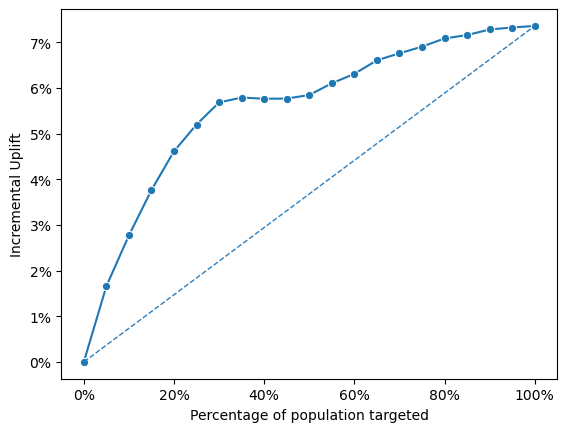

In [49]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_nn", "ad", 1, qnt = 20)

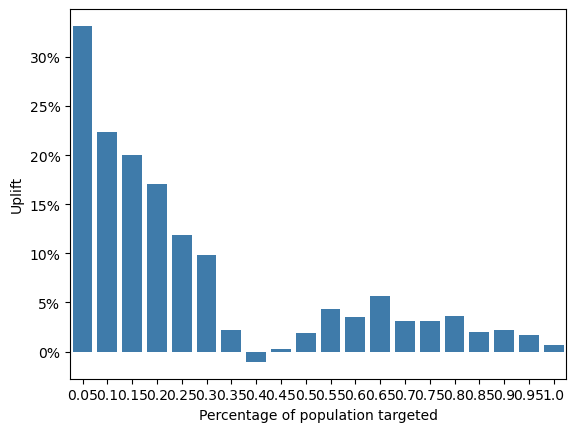

In [50]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_nn", "ad", 1, qnt = 20)

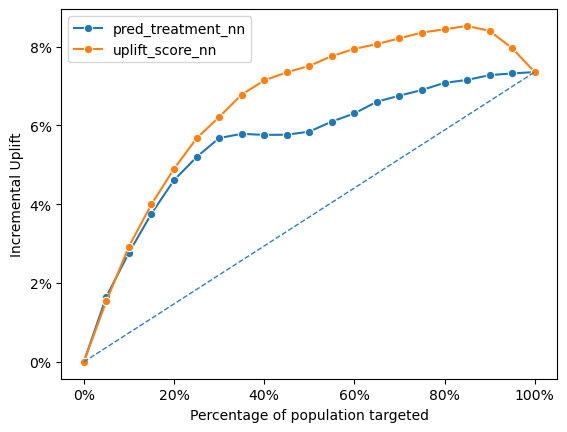

In [51]:
# compare both models with the incremental uplift plot
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_nn", "uplift_score_nn"],
    "ad",
    1,
    qnt = 20
)

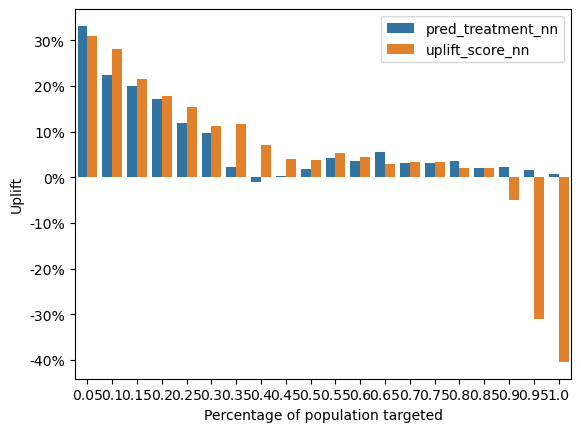

In [52]:
# compare both models with the uplift plot
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_nn", "uplift_score_nn"],
    "ad",
    1,
    qnt = 20
)

**Comparison:**

The first graph compares the predicted treatment probability (pred_treatment_nn) with the uplift score (uplift_score_nn), showing how incremental uplift changes as more of the population is targeted. The uplift model (orange line) consistently outperforms the treatment probability model (blue line), indicating that it more effectively identifies customers whose behavior is influenced by the ad.

The second plot provides a more detailed breakdown of uplift percentages across different customer segments. The left side of the graph represents the top-ranked customers based on uplift, and both models (treatment probability and uplift score) capture high uplift in these bins. However, the uplift model slightly outperforms the treatment probability model in these key segments, reinforcing its ability to identify persuadable customers who are most likely to be influenced by the ad.

As we move toward the right side of the graph (lower uplift bins), the difference between the models becomes more pronounced. The treatment probability model remains relatively stable, whereas the uplift model drops sharply into negative uplift territory in the lowest bins. This means that for these segments, targeting these customers with ads actually reduces conversions, likely because these individuals would have converted on their own or reacted negatively to the advertisement. These negative uplift bins should be avoided to prevent wasted ad spend and unintended adverse effects.

### 6. Using the incremental_resp column from the uplift table for the propensity model, extrapolate the incremental profit you would expect to make if you targeted the best 30,000 customers out of of 120,000 using the propensity model. How much more do you expect to make from using an uplift rather than a propensity model?

In [53]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_prop_bin5_nn = propensity_tab_nn.loc[propensity_tab_nn["cum_prop"] == 0.25, "incremental_resp"].values[0]
total_revenue_prop_nn = incremental_resp_prop_bin5_nn * rev
total_cost_prop_nn = sample_target * cost
total_profit_prop_nn = total_revenue_prop_nn - total_cost_prop_nn
profit_scaled_prop_nn = total_profit_prop_nn * scaling_factor

profit_diff_nn = profit_scaled_uplift_nn - profit_scaled_prop_nn
print(f"uplift ({profit_scaled_uplift_nn}) - propensity ({profit_scaled_prop_nn}) =", profit_diff_nn)

uplift (57045.425816023744) - propensity (48488.9837837838) = 8556.442032239946


## 8. Random Forrest Model

### 2. Add predictions using the treatment and control models, i.e., pred_control and pred_treatment, to cg_rct_stacked and calculate the uplift score.

In [54]:
clf_treatment_rf = rsm.model.rforest(
    {"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
)
clf_control_rf = rsm.model.rforest(
    {"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
)

clf_treatment_rf.summary()
clf_control_rf.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : sqrt (4)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.759

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapo

In [55]:
# grid search parameters
param_grid = {"max_features": list(range(1, 6)), "n_estimators": np.arange(100, 600, 100)}
scoring = {"AUC": "roc_auc"}
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

In [56]:
cv_treatment_rf = GridSearchCV(
    clf_treatment_rf.fitted,
    param_grid,
    scoring=scoring,
    cv=stratified_k_fold,
    n_jobs=4,
    refit=list(scoring.keys())[0],
    verbose=5,
    ).fit(clf_treatment_rf.data_onehot, clf_treatment_rf.data.converted)
cv_treatment_rf

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             n_jobs=4,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': array([100, 200, 300, 400, 500])},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [57]:
cv_control_rf = GridSearchCV(
    clf_control_rf.fitted,
    param_grid,
    scoring=scoring,
    cv=stratified_k_fold,
    n_jobs=4,
    refit=list(scoring.keys())[0],
    verbose=5,
    ).fit(clf_control_rf.data_onehot, clf_control_rf.data.converted)
cv_control_rf

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             n_jobs=4,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': array([100, 200, 300, 400, 500])},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [58]:
clf_treatment_rf = rsm.model.rforest(
    {"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
    random_state=1234,
    **cv_treatment_rf.best_params_ # (5,5) 400
)
clf_control_rf = rsm.model.rforest(
    {"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
    random_state=1234,
    **cv_control_rf.best_params_
)

clf_treatment_rf.summary()
clf_control_rf.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 2 (2)
n_estimators         : 500
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.775

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapon_y

In [59]:
# predictions
cg_rct_stacked["pred_treatment_rf"] = clf_treatment_rf.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_rf"] = clf_control_rf.predict(cg_rct_stacked)["prediction"]

In [60]:
# uplift score
cg_rct_stacked["uplift_score_rf"] = cg_rct_stacked.pred_treatment_rf - cg_rct_stacked.pred_control_rf
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,training,pred_treatment,pred_control,uplift_score,pred_treatment_nn,pred_control_nn,uplift_score_nn,pred_treatment_rf,pred_control_rf,uplift_score_rf
0,no,7,18,0,124,0,81,0,yes,no,...,1.0,0.082031,0.018729,0.063302,0.014465,0.011456,0.003010,0.024,0.0000,0.0240
1,no,10,3,2,60,0,18,479,no,no,...,1.0,0.186298,0.035720,0.150578,0.065250,0.009165,0.056085,0.208,0.0550,0.1530
2,no,2,1,0,0,0,0,0,no,no,...,1.0,0.047125,0.012379,0.034746,0.028032,0.001165,0.026867,0.036,0.0000,0.0360
3,no,2,11,1,125,0,73,217,no,no,...,0.0,0.092398,0.010224,0.082174,0.067739,0.009421,0.058318,0.188,0.0225,0.1655
4,no,8,15,0,0,0,6,51,yes,no,...,1.0,0.307346,0.088581,0.218765,0.295513,0.078535,0.216978,0.268,0.0200,0.2480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0.0,0.115326,0.024719,0.090608,0.034123,0.004489,0.029634,0.028,0.0000,0.0280
59996,no,9,12,0,78,0,59,1,yes,no,...,1.0,0.061149,0.012370,0.048779,0.032198,0.010600,0.021598,0.008,0.0125,-0.0045
59997,no,9,19,1,271,0,71,95,yes,no,...,1.0,0.062747,0.021071,0.041676,0.053339,0.013720,0.039618,0.036,0.0075,0.0285
59998,no,10,23,0,76,6,20,107,no,no,...,0.0,0.140842,0.106917,0.033925,0.356386,0.130197,0.226189,0.186,0.3175,-0.1315


In [61]:
# Sort the data on uplift score from highest to lowest, selecting a few key columns.
(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment_rf", "pred_control_rf", "uplift_score_rf"]]
    .query("training == 0")
    .sort_values("uplift_score_rf", ascending=False)
)

,converted,ad,training,pred_treatment_rf,pred_control_rf,uplift_score_rf
48555,no,1,0.0,0.620,0.0350,0.5850
11965,no,0,0.0,0.634,0.0500,0.5840
21992,no,0,0.0,0.584,0.0075,0.5765
31352,no,1,0.0,0.646,0.0825,0.5635
9186,no,0,0.0,0.636,0.0900,0.5460
...,...,...,...,...,...,...
19860,no,0,0.0,0.046,0.7300,-0.6840
42024,no,1,0.0,0.120,0.8075,-0.6875
50878,no,1,0.0,0.078,0.7800,-0.7020
30561,no,1,0.0,0.070,0.7775,-0.7075


### 3. Calculate the Uplift (%) and Incremental Uplift (%) for the uplift model (use 20 instead of the standard 10 bins) and plot performance metrics. Interpret the plots. 

In [62]:
uplift_tab_rf = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt = 20)
uplift_tab_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_rf,1,0.05,200,448,50,578,161.245675,1.791619,0.359923
1,uplift_score_rf,2,0.10,337,899,86,1142,269.299475,2.992216,0.239940
2,uplift_score_rf,3,0.15,469,1349,121,1692,372.528960,4.139211,0.229697
3,uplift_score_rf,4,0.20,565,1800,138,2199,452.039563,5.022662,0.179330
4,uplift_score_rf,5,0.25,637,2250,169,2720,497.202206,5.524469,0.100499
5,uplift_score_rf,6,0.30,704,2697,186,3205,547.481435,6.083127,0.114837
6,uplift_score_rf,7,0.35,765,3149,206,3691,589.249797,6.547220,0.093803
7,uplift_score_rf,8,0.40,799,3589,223,4213,609.029195,6.766991,0.044706
8,uplift_score_rf,9,0.45,836,4039,229,4646,636.918855,7.076876,0.068365
9,uplift_score_rf,10,0.50,872,4492,236,5142,665.832750,7.398142,0.065357


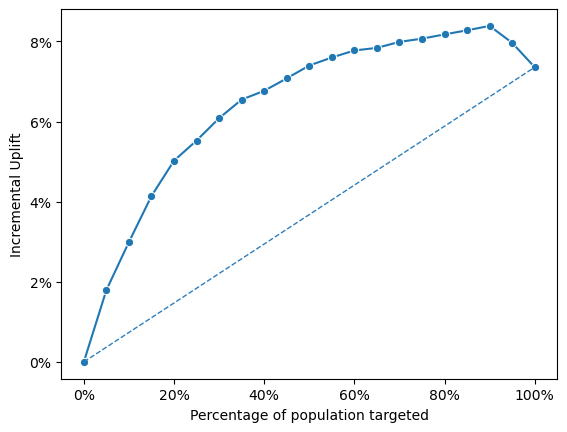

In [63]:
# incremental uplift plot
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt = 20)

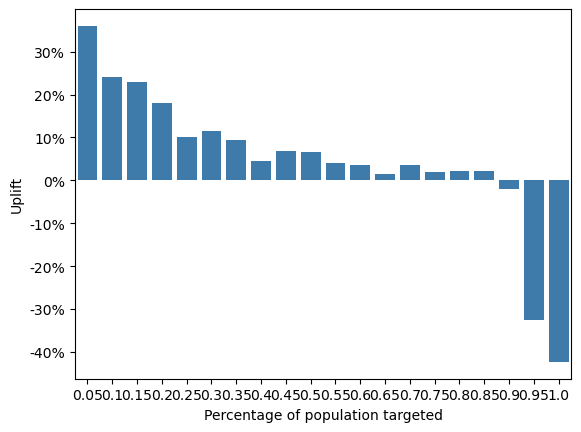

In [64]:
# uplift plot
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt = 20)

**Interpretation:**

The incremental graph illustrates how incremental uplift changes as more customers are targeted. The uplift curve rises consistently up to around 80% of the population, at which point it starts to plateau and slightly decline. This suggests that focusing on the top 80% of ranked customers is the most effective, while targeting beyond that yields diminishing returns.

The uplift chart provides a more detailed view of uplift distribution across different customer groups. The highest-ranked segments (leftmost bars) exhibit strong positive uplift, indicating that these customers are the best targets for the ad. As we move toward lower-scoring groups (right side), uplift gradually declines and eventually turns negative, meaning that advertising to these customers could actually reduce conversions rather than improve them.



### 4. Using the incremental_resp column from the performance metric table created through the uplift_tab function, extrapolate the incremental profit you expect to make if you targeted the best 30,000 customers of 120,000 using the uplift model.

In [65]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000

rev = 14.99
cost = 1.50

incremental_resp_uplift_bin5_rf = uplift_tab_rf.loc[uplift_tab_rf["cum_prop"] == 0.25, "incremental_resp"].values[0]
scaling_factor = 9_000 / 120_000

total_revenue_uplift_rf = incremental_resp_uplift_bin5_rf * rev
total_cost_uplift_rf = sample_target * cost
total_profit_uplift_rf = total_revenue_uplift_rf - total_cost_uplift_rf

profit_scaled_uplift_rf = total_profit_uplift_rf / scaling_factor

profit_scaled_uplift_rf

54374.14754901961

### 5. Calculate the Uplift (%) and Incremental Uplift (%) you would get if you used a  propensity model (use 20 instead of the standard 10 bins). Compare the performance metrics between the uplift and propensity models and interpret the differences.

In [66]:
propensity_tab_rf = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rf", "ad", 1, qnt = 20)
propensity_tab_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_rf,1,0.05,204,445,72,594,150.060606,1.667340,0.337215
1,pred_treatment_rf,2,0.10,354,883,125,1085,252.271889,2.803021,0.234523
2,pred_treatment_rf,3,0.15,492,1350,178,1584,340.295455,3.781061,0.189291
3,pred_treatment_rf,4,0.20,583,1789,214,2016,393.096230,4.367736,0.123956
4,pred_treatment_rf,5,0.25,698,2243,253,2423,463.794882,5.153276,0.157481
5,pred_treatment_rf,6,0.30,772,2684,308,2848,481.735955,5.352622,0.038389
6,pred_treatment_rf,7,0.35,836,3137,350,3302,503.489400,5.594327,0.048769
7,pred_treatment_rf,8,0.40,883,3557,397,3683,499.581863,5.550910,-0.011455
8,pred_treatment_rf,9,0.45,938,4021,439,4115,509.028190,5.655869,0.021312
9,pred_treatment_rf,10,0.50,985,4472,462,4530,528.915232,5.876836,0.048791


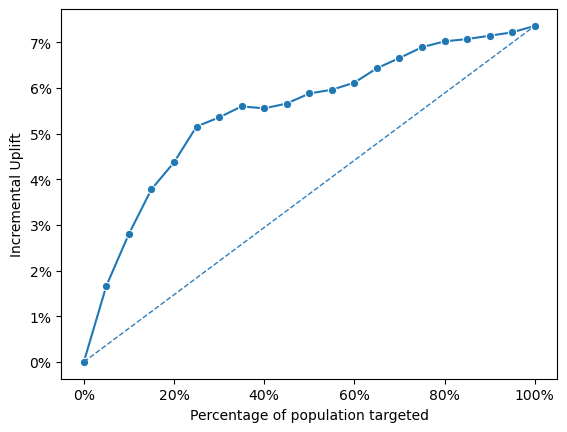

In [67]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rf", "ad", 1, qnt = 20)

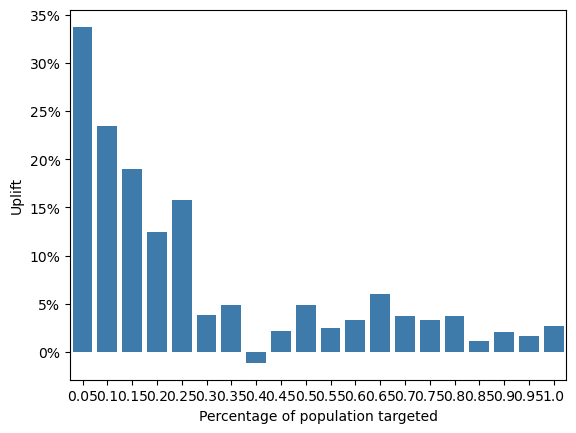

In [68]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rf", "ad", 1, qnt = 20)

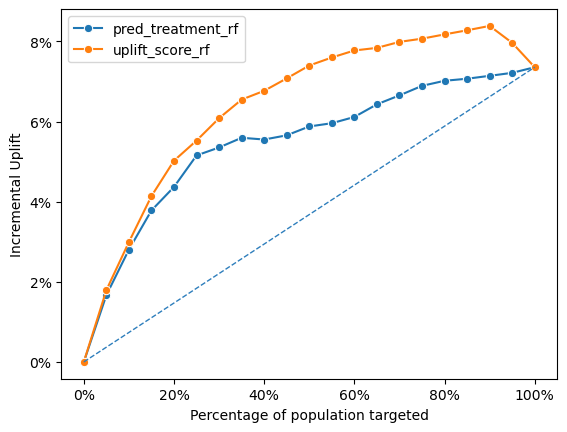

In [69]:
# compare both models with the incremental uplift plot
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_rf", "uplift_score_rf"],
    "ad",
    1,
    qnt = 20
)

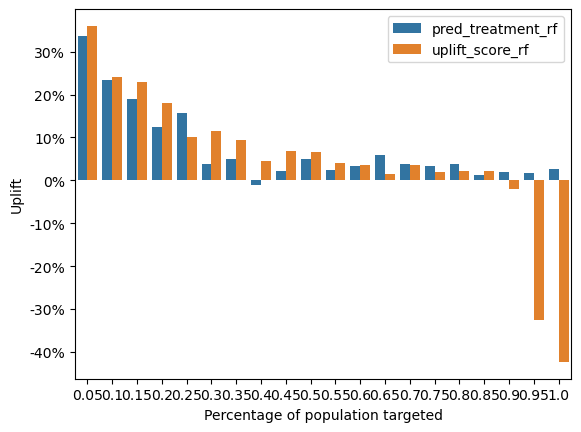

In [70]:
# compare both models with the uplift plot
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_rf", "uplift_score_rf"],
    "ad",
    1,
    qnt = 20
)

**Comparison:**

The uplift model (orange line) consistently outperforms the treatment probability model (blue line), meaning it better identifies customers who are actually influenced by the ad. 

The highest-ranking bins (left side), the uplift model captures more incremental conversions compared to the treatment probability model. However, as we move toward the right side (lower bins), uplift declines significantly, with the lowest bins showing negative uplift. This suggests that advertising to these customers reduces conversions.

### 6. Using the incremental_resp column from the uplift table for the propensity model, extrapolate the incremental profit you would expect to make if you targeted the best 30,000 customers out of of 120,000 using the propensity model. How much more do you expect to make from using an uplift rather than a propensity model?

In [71]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_prop_bin5_rf = propensity_tab_rf.loc[propensity_tab_rf["cum_prop"] == 0.25, "incremental_resp"].values[0]
total_revenue_prop_rf = incremental_resp_prop_bin5_rf * rev
total_cost_prop_rf = sample_target * cost
total_profit_prop_rf = total_revenue_prop_rf - total_cost_prop_rf
profit_scaled_prop_rf = total_profit_prop_rf * scaling_factor
profit_diff_rf = profit_scaled_uplift_rf - profit_scaled_prop_rf

print(f"uplift ({profit_scaled_uplift_rf}) - propensity ({profit_scaled_prop_rf}) =", profit_diff_rf)

uplift (54374.14754901961) - propensity (47697.13715779337) = 6677.010391226242


## 9. XGBoost Model

### 2. Add predictions using the treatment and control models, i.e., pred_control and pred_treatment, to cg_rct_stacked and calculate the uplift score.

In [72]:
clf_treatment_xgb = rsm.model.xgboost(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234,
)

clf_control_xgb = rsm.model.xgboost(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234,
)

clf_treatment_xgb.summary()
clf_control_xgb.summary()

XGBoost
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 6
min_child_weight     : 1
learning_rate        : 0.3
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.959

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

In [73]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": list(range(7)),
    "min_child_weight": [1, 5, 10],
    "learning_rate": [0.1, 0.2, 0.3],
}
scoring = {"AUC": "roc_auc"}
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

In [74]:
cv_treatment_xgb = GridSearchCV(
    clf_treatment_xgb.fitted,
    param_grid,
    scoring=scoring,
    cv=stratified_k_fold,
    n_jobs=4,
    refit=list(scoring.keys())[0],
    verbose=5,
).fit(clf_treatment_xgb.data_onehot, clf_treatment_xgb.data.converted)
cv_treatment_xgb

Fitting 5 folds for each of 189 candidates, totalling 945 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=1.0, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_ty...
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1234, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [75]:
cv_control_xgb = GridSearchCV(
    clf_control_xgb.fitted,
    param_grid,
    scoring=scoring,
    cv=stratified_k_fold,
    n_jobs=4,
    refit=list(scoring.keys())[0],
    verbose=5,
).fit(clf_control_xgb.data_onehot, clf_control_xgb.data.converted)
cv_control_xgb

Fitting 5 folds for each of 189 candidates, totalling 945 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=1.0, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_ty...
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1234, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [76]:
clf_treatment_xgb = rsm.model.xgboost(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=cols,
    random_state=1234,
    **cv_treatment_xgb.best_params_ #(5,5) 400
)

clf_control_xgb = rsm.model.xgboost(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=cols,
    random_state=1234,
    **cv_control_xgb.best_params_ #(5,) 400
)

clf_treatment_xgb.summary()
clf_control_xgb.summary()

XGBoost
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 50
max_depth            : 6
min_child_weight     : 10
learning_rate        : 0.1
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.836

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

In [77]:
# predictions
cg_rct_stacked["pred_treatment_xgb"] = clf_treatment_xgb.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_xgb"] = clf_control_xgb.predict(cg_rct_stacked)["prediction"]

In [78]:
# uplift score
cg_rct_stacked["uplift_score_xgb"] = cg_rct_stacked.pred_treatment_xgb - cg_rct_stacked.pred_control_xgb

cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,uplift_score,pred_treatment_nn,pred_control_nn,uplift_score_nn,pred_treatment_rf,pred_control_rf,uplift_score_rf,pred_treatment_xgb,pred_control_xgb,uplift_score_xgb
0,no,7,18,0,124,0,81,0,yes,no,...,0.063302,0.014465,0.011456,0.003010,0.024,0.0000,0.0240,0.008414,0.002308,0.006105
1,no,10,3,2,60,0,18,479,no,no,...,0.150578,0.065250,0.009165,0.056085,0.208,0.0550,0.1530,0.195740,0.029982,0.165758
2,no,2,1,0,0,0,0,0,no,no,...,0.034746,0.028032,0.001165,0.026867,0.036,0.0000,0.0360,0.036105,0.003978,0.032126
3,no,2,11,1,125,0,73,217,no,no,...,0.082174,0.067739,0.009421,0.058318,0.188,0.0225,0.1655,0.080723,0.020397,0.060327
4,no,8,15,0,0,0,6,51,yes,no,...,0.218765,0.295513,0.078535,0.216978,0.268,0.0200,0.2480,0.262158,0.044587,0.217571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0.090608,0.034123,0.004489,0.029634,0.028,0.0000,0.0280,0.031036,0.002822,0.028214
59996,no,9,12,0,78,0,59,1,yes,no,...,0.048779,0.032198,0.010600,0.021598,0.008,0.0125,-0.0045,0.051631,0.012965,0.038666
59997,no,9,19,1,271,0,71,95,yes,no,...,0.041676,0.053339,0.013720,0.039618,0.036,0.0075,0.0285,0.099987,0.032695,0.067292
59998,no,10,23,0,76,6,20,107,no,no,...,0.033925,0.356386,0.130197,0.226189,0.186,0.3175,-0.1315,0.117949,0.296558,-0.178608


In [79]:
# Sort the data on uplift score from highest to lowest, selecting a few key columns.
(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment_xgb", "pred_control_xgb", "uplift_score_xgb"]]
    .query("training == 0")
    .sort_values("uplift_score_xgb", ascending=False)
)

,converted,ad,training,pred_treatment_xgb,pred_control_xgb,uplift_score_xgb
4833,no,0,0.0,0.853086,0.061574,0.791512
37247,yes,1,0.0,0.820526,0.102439,0.718087
7047,no,0,0.0,0.757980,0.050896,0.707084
31303,no,1,0.0,0.801559,0.098617,0.702943
1358,no,0,0.0,0.762222,0.060070,0.702152
...,...,...,...,...,...,...
35806,no,1,0.0,0.087440,0.849940,-0.762501
41249,no,1,0.0,0.077171,0.847560,-0.770389
33374,no,1,0.0,0.054242,0.829972,-0.775730
50755,no,1,0.0,0.077613,0.898951,-0.821338


### 3. Calculate the Uplift (%) and Incremental Uplift (%) for the uplift model (use 20 instead of the standard 10 bins) and plot performance metrics. Interpret the plots.

In [80]:
uplift_tab_xgb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt = 20)
uplift_tab_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_xgb,1,0.05,217,450,74,609,162.320197,1.803558,0.360712
1,uplift_score_xgb,2,0.10,356,900,111,1121,266.883140,2.965368,0.236623
2,uplift_score_xgb,3,0.15,478,1350,141,1610,359.770186,3.997447,0.209761
3,uplift_score_xgb,4,0.20,593,1800,165,2138,454.085126,5.045390,0.210101
4,uplift_score_xgb,5,0.25,665,2250,192,2680,503.805970,5.597844,0.110185
5,uplift_score_xgb,6,0.30,741,2700,211,3189,562.354657,6.248385,0.131561
6,uplift_score_xgb,7,0.35,797,3150,225,3720,606.475806,6.738620,0.098079
7,uplift_score_xgb,8,0.40,854,3600,239,4222,650.210327,7.224559,0.098778
8,uplift_score_xgb,9,0.45,897,4050,248,4717,684.068052,7.600756,0.077374
9,uplift_score_xgb,10,0.50,937,4500,261,5204,711.308224,7.903425,0.062195


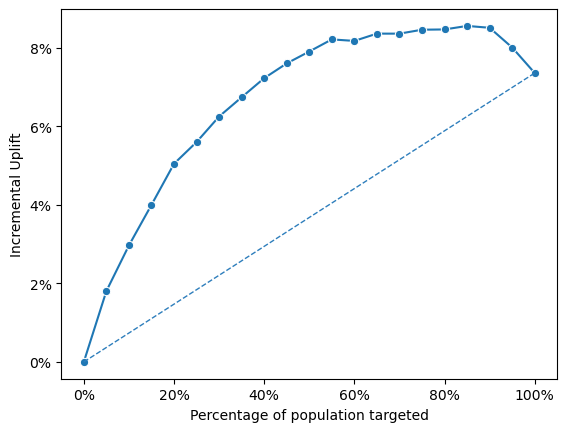

In [81]:
# incremental uplift plot
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt = 20)

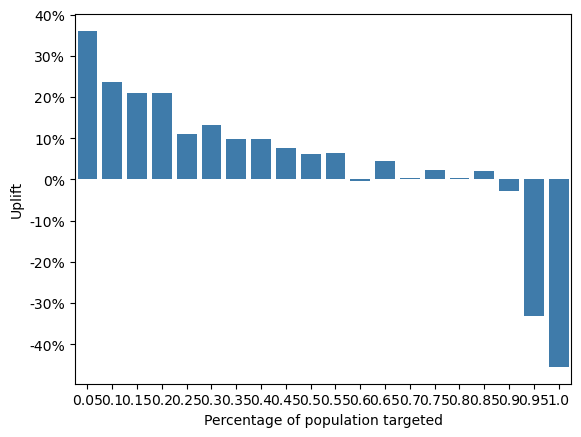

In [82]:
# uplift plot
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt = 20)

**Interpretation:**

The uplift model plots provide a clear picture of how well the XGBoost-based uplift score identifies the right customers to target with ads. The uplift table breaks down customers into 20 quantiles, showing the incremental response and uplift percentages for each group. The top bins, which contain customers with the highest uplift scores, have a significantly higher incremental response, meaning these customers are the most positively influenced by the ad. Meanwhile, lower uplift bins contribute less, and some even show negative uplift, indicating that ads may be counterproductive for those groups.

The incremental uplift plot reinforces this by showing how uplift accumulates as more of the population is targeted. The solid line represents the model’s effectiveness, while the dotted line represents a random baseline. The model performs well for the first 60-70% of the population, with uplift steadily increasing. However, after 80%, uplift flattens and starts declining, suggesting that continuing to target beyond this point offers little to no benefit.

The uplift distribution plot further supports this insight, illustrating how different population segments respond to the ad. The highest-scoring bins show strong positive uplift, meaning these customers are highly persuadable. The middle bins have smaller but still positive uplift. However, the bottom 20% of customers exhibit negative uplift, meaning showing ads to them reduces conversions, likely because they were going to convert anyway or because the ad discouraged them.

### 4. Using the incremental_resp column from the performance metric table created through the uplift_tab function, and extrapolate the incremental profit you expect to make if you targeted the best 30,000 customers of 120,000 using the uplift model.

In [83]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_uplift_bin5_xgb = uplift_tab_xgb.loc[uplift_tab_xgb["cum_prop"] == 0.25, "incremental_resp"].values[0]
total_revenue_uplift_xgb = incremental_resp_uplift_bin5_xgb * rev
total_cost_uplift_xgb = sample_target * cost
total_profit_uplift_xgb = total_revenue_uplift_xgb - total_cost_uplift_xgb
profit_scaled_uplift_xgb = total_profit_uplift_xgb * scaling_factor

profit_scaled_uplift_xgb

55694.01990049753

### 5. Calculate the Uplift (%) and Incremental Uplift (%) you would get if you used a propensity model (use 20 instead of the standard 10 bins). Compare the performance metrics between the uplift and propensity models and interpret the differences.

In [84]:
propensity_tab_xgb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb", "ad", 1, qnt = 20)
propensity_tab_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_xgb,1,0.05,210,450,81,575,146.608696,1.628986,0.325797
1,pred_treatment_xgb,2,0.10,362,900,135,1038,244.947977,2.721644,0.221147
2,pred_treatment_xgb,3,0.15,494,1350,182,1536,334.039062,3.711545,0.198956
3,pred_treatment_xgb,4,0.20,603,1800,226,2004,400.005988,4.444511,0.148205
4,pred_treatment_xgb,5,0.25,688,2250,273,2429,435.118156,4.834646,0.078301
5,pred_treatment_xgb,6,0.30,765,2700,324,2869,460.085396,5.112060,0.055202
6,pred_treatment_xgb,7,0.35,834,3150,368,3344,487.349282,5.414992,0.060702
7,pred_treatment_xgb,8,0.40,896,3600,398,3738,512.693419,5.696594,0.061636
8,pred_treatment_xgb,9,0.45,949,4050,437,4178,525.388224,5.837647,0.029141
9,pred_treatment_xgb,10,0.50,990,4500,458,4582,540.196421,6.002182,0.039131


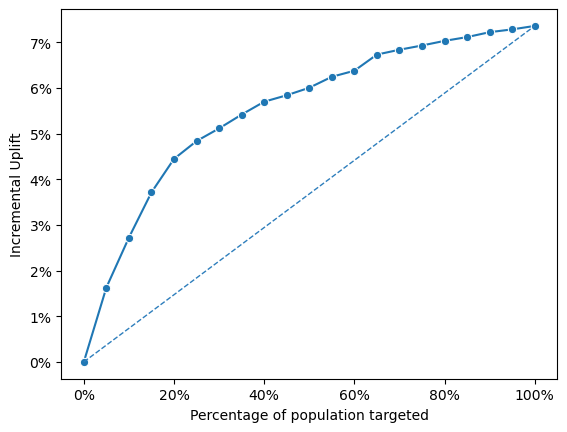

In [85]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb", "ad", 1, qnt = 20)

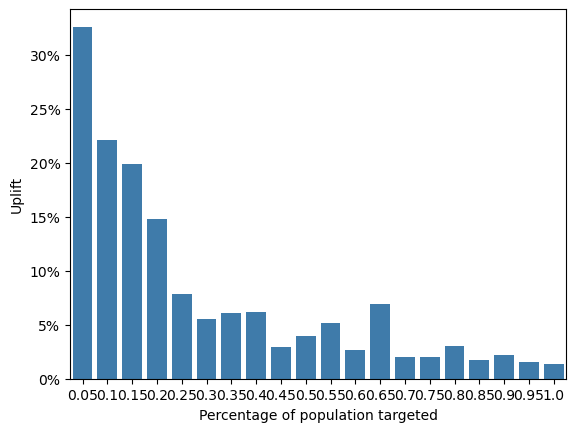

In [86]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb", "ad", 1, qnt = 20)

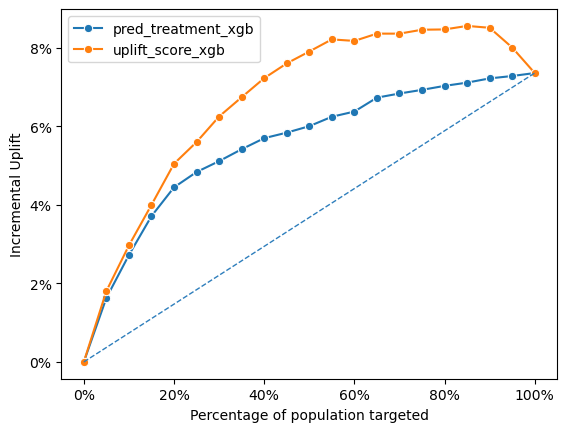

In [87]:
# compare both models with the incremental uplift plot
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_xgb", "uplift_score_xgb"],
    "ad",
    1,
    qnt = 20
)

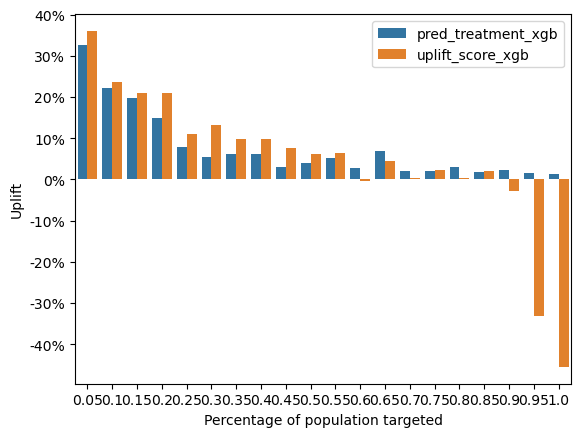

In [88]:
# compare both models with the uplift plot
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment_xgb", "uplift_score_xgb"],
    "ad",
    1,
    qnt = 20
)

**Comparison:**

The Incremental Uplift Plot compares predicted treatment probability and uplift score in terms of cumulative uplift. The uplift score model (orange line) consistently outperforms the treatment probability model (blue line), showing that uplift modeling is better at identifying persuadable customers—those who actually need the ad to convert. The uplift score peaks around 80% of the population targeted, after which incremental uplift declines, suggesting diminishing returns beyond this point.

The Uplift Distribution Plot provides a bin-by-bin comparison of uplift across different segments of the population. Again, the uplift score model captures higher uplift percentages in the top bins, meaning it more effectively identifies high-value customers. However, in the lower bins, the uplift model sharply drops into negative uplift territory, highlighting that targeting these customers with ads is counterproductive. In contrast, the treatment probability model shows a more consistent but lower uplift across all bins, indicating that it is less effective at isolating persuadable customers.



### 6. Using the incremental_resp column from the uplift table for the propensity model, extrapolate the incremental profit you would expect to make if you targeted the best 30,000 customers out of of 120,000 using the propensity model. How much more do you expect to make from using an uplift rather than a propensity model? 

In [89]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

incremental_resp_prop_bin5_xgb = propensity_tab_xgb.loc[propensity_tab_xgb["cum_prop"] == 0.25, "incremental_resp"].values[0]

total_revenue_prop_xgb = incremental_resp_prop_bin5_xgb * rev
total_cost_prop_xgb = sample_target * cost
total_profit_prop_xgb = total_revenue_prop_xgb - total_cost_prop_xgb
profit_scaled_prop_xgb = total_profit_prop_xgb * scaling_factor
profit_diff_xgb = profit_scaled_uplift_xgb - profit_scaled_prop_xgb

print(f"uplift ({profit_scaled_uplift_xgb}) - propensity ({profit_scaled_prop_xgb}) =", profit_diff_xgb)

uplift (55694.01990049753) - propensity (41965.615369836705) = 13728.404530660824


# Part II: Targeting the optimal proportion of customers

So far, we have targeted 25% of model-selected customers by picking the best 30,000  out of the set of 120,000 customers. Determine if more or less than 25% of customers should be targeted. 

### 1. What formula would you use to select customers to target using a propensity model if your goal is to maximize expected profits? What percentage of customers in the ad treatment test set in cg_rct_stacked would you target based on a propensity model?

To maximize expected profits using a propensity model, select customers based on the expected incremental profit per customer.

**Optimal targeting formula:**
- P(T=1 | X) >  (C/R)

Where:
- **P(T=1 | X)** = Probability of conversion if targeted (propensity score).
- **C** = Cost of targeting (e.g., marketing cost per customer).
- **R** = Revenue per conversion (e.g., average order value).


In [148]:
C = 1.50  
R = 14.99  

threshold = C / R

p2_ad_treatment_filter_logit = cg_rct_stacked.query("training == 0 & ad == 1")
p2_prop_ad_treatment_test_set_logit = p2_ad_treatment_filter_logit[p2_ad_treatment_filter_logit["pred_treatment"] > threshold]

target_percentage_propensity_logit = (len(p2_prop_ad_treatment_test_set_logit) / len(p2_ad_treatment_filter_logit)) * 100

print(f"Optimal Percentage of Customers to Target (Propensity Model): {target_percentage_propensity_logit:.2f}%")

Optimal Percentage of Customers to Target (Propensity Model): 47.99%


### 2. What formula would you use to select customers to target using an uplift model if your goal is to maximize expected incremental profits? What percentage of customers in the ad treatment test set in cg_rct_stacked would you target based on an uplift model?

To maximize expected incremental profits, you should select customers based on their incremental response to the ad, rather than just conversion probability.

**Optimal targeting formula:**
- Net Expected Profit = (P(T = 1|X) - P(T = 0|X)) × Profit per Conversion − Cost per Ad

Where:
- P(T=1 | X) = Probability of conversion if the customer is shown the ad (from the propensity model).
- P(T=0 | X) = Probability of conversion if the customer is NOT shown the ad.
- Profit per Conversion = Revenue generated per conversion.
- Cost per Ad = Cost of displaying the ad to a customer.

In [150]:
C = 1.50  
R = 14.99 
threshold = C / R

p2_ad_treatment_filter_logit = cg_rct_stacked.query("training == 0 & ad == 1")
p2_uplift_ad_treatment_test_set_logit = p2_ad_treatment_filter_logit[p2_ad_treatment_filter_logit["uplift_score"] > threshold]

target_percentage_uplift_logit = len(p2_uplift_ad_treatment_test_set_logit) / len(p2_ad_treatment_filter_logit) * 100
print(f"Optimal Percentage of Customers to Target: {target_percentage_uplift_logit:.2f}%")

Optimal Percentage of Customers to Target: 21.93%


### 3. Rounding the targeting percentage numbers you calculated in 1. and 2. to the nearest 5%, use the uplift table you created for the propensity and uplift models based on Logistic regression in Part I to extrapolate the incremental profits if you targeted the optimal percentage of customers out of 120K as suggested by the propensity-to-buy and the uplift model.

In [192]:
target_ratio = 30_000 / 120_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50

rounded_target_percentage_propensity_logit = round(target_percentage_propensity_logit / 5) * 5 / 100
p2_incremental_resp_prop_bin5_logit = propensity_tab.loc[propensity_tab["cum_prop"] == rounded_target_percentage_propensity_logit, "incremental_resp"].values[0]
p2_total_revenue_prop_logit = p2_incremental_resp_prop_bin5_logit * rev
p2_total_cost_prop_logit = propensity_tab.loc[propensity_tab["cum_prop"] == rounded_target_percentage_propensity_logit, "T_n"].values[0] * cost
p2_total_profit_prop_logit = p2_total_revenue_prop_logit - p2_total_cost_prop_logit
p2_profit_scaled_prop_logit = p2_total_profit_prop_logit * scaling_factor

rounded_target_percentage_uplift_logit = round(target_percentage_uplift_logit / 5) * 5 / 100
p2_incremental_resp_uplift_bin5_logit = uplift_tab.loc[uplift_tab["cum_prop"] == rounded_target_percentage_uplift_logit, "incremental_resp"].values[0]
p2_total_revenue_uplift_logit = p2_incremental_resp_uplift_bin5_logit * rev
p2_total_cost_uplift_logit = uplift_tab.loc[uplift_tab["cum_prop"] == rounded_target_percentage_uplift_logit, "T_n"].values[0] * cost
p2_total_profit_uplift_logit = p2_total_revenue_uplift_logit - p2_total_cost_uplift_logit
p2_profit_scaled_uplift_logit = p2_total_profit_uplift_logit * scaling_factor

print(f"""
Rounded Target Percentage (Uplift - Logit):** {rounded_target_percentage_uplift_logit:.2f}%
Rounded Target Percentage (Propensity - Logit):** {rounded_target_percentage_propensity_logit:.2f}%

Incremental Response (Uplift - Logit, {target_percentage_propensity_logit}% Bin):** {p2_incremental_resp_uplift_bin5_logit:,.2f}
Incremental Response (Propensity - Logit, {target_percentage_uplift_logit}% Bin):** {p2_incremental_resp_prop_bin5_logit:,.2f}

Profit (Propensity Model - Logit):** ${p2_profit_scaled_prop_logit:,.2f}
Profit (Uplift Model - Logit):** ${p2_profit_scaled_uplift_logit:,.2f}
""")


Rounded Target Percentage (Uplift - Logit):** 0.20%
Rounded Target Percentage (Propensity - Logit):** 0.50%

Incremental Response (Uplift - Logit, 47.98888888888889% Bin):** 402.21
Incremental Response (Propensity - Logit, 21.933333333333334% Bin):** 454.30

Profit (Propensity Model - Logit):** $799.86
Profit (Uplift Model - Logit):** $44,387.75



### 4. Neural Network Model

In [ ]:
target_ratio = 30_000 / 120_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50
p2_ad_treatment_filter_nn = cg_rct_stacked.query("training == 0 & ad == 1")

## 1
p2_prop_ad_treatment_test_set_nn = p2_ad_treatment_filter_nn[p2_ad_treatment_filter_nn["pred_treatment_nn"] > threshold]
target_percentage_propensity_nn = (len(p2_prop_ad_treatment_test_set_nn) / len(p2_ad_treatment_filter_nn)) * 100
print(f"Optimal Percentage of Customers to Target (Propensity Model): {target_percentage_propensity_nn:.2f}%")

## 2
p2_uplift_ad_treatment_test_set_nn = p2_ad_treatment_filter_nn[p2_ad_treatment_filter_nn["uplift_score_nn"] > threshold]
target_percentage_uplift_nn = len(p2_uplift_ad_treatment_test_set_nn) / len(p2_ad_treatment_filter_nn) * 100
print(f"Optimal Percentage of Customers to Target: {target_percentage_uplift_nn:.2f}%")

## 3
p2_rounded_target_percentage_propensity_nn = round(target_percentage_propensity_nn / 5) * 5 / 100
p2_incremental_resp_prop_bin5_nn = propensity_tab_nn.loc[propensity_tab_nn["cum_prop"] == p2_rounded_target_percentage_propensity_nn, "incremental_resp"].values[0]
p2_total_revenue_prop_nn = p2_incremental_resp_prop_bin5_nn * rev
p2_total_cost_prop_nn = propensity_tab_nn.loc[propensity_tab_nn["cum_prop"] == p2_rounded_target_percentage_propensity_nn, "T_n"].values[0] * cost
p2_total_profit_prop_nn = p2_total_revenue_prop_nn - p2_total_cost_prop_nn
p2_profit_scaled_prop_nn = p2_total_profit_prop_nn * scaling_factor

p2_rounded_target_percentage_uplift_nn = round(target_percentage_uplift_nn / 5) * 5 / 100
p2_incremental_resp_uplift_bin5_nn = uplift_tab_nn.loc[uplift_tab_nn["cum_prop"] == p2_rounded_target_percentage_uplift_nn, "incremental_resp"].values[0]
p2_total_revenue_uplift_nn = p2_incremental_resp_uplift_bin5_nn * rev
p2_total_cost_uplift_nn = uplift_tab_nn.loc[uplift_tab_nn["cum_prop"] == p2_rounded_target_percentage_uplift_nn, "T_n"].values[0] * cost
p2_total_profit_uplift_nn = p2_total_revenue_uplift_nn - p2_total_cost_uplift_nn
p2_profit_scaled_uplift_nn = p2_total_profit_uplift_nn * scaling_factor

# Print results
print(f"""
Rounded Target Percentage (Propensity - NN):** {p2_rounded_target_percentage_propensity_nn:.2f}%
Rounded Target Percentage (Uplift - NN):** {p2_rounded_target_percentage_uplift_nn:.2f}%

Incremental Response (Propensity - NN, {target_percentage_propensity_nn}% Bin):** {p2_incremental_resp_prop_bin5_nn:,.2f}
Incremental Response (Uplift - NN, {target_percentage_uplift_nn}% Bin):** {p2_incremental_resp_uplift_bin5_nn:,.2f}

Profit (Propensity Model - NN):** ${p2_profit_scaled_prop_nn:,.2f}
Profit (Uplift Model - NN):** ${p2_profit_scaled_uplift_nn:,.2f}
""")

Optimal Percentage of Customers to Target (Propensity Model): 43.42%
Optimal Percentage of Customers to Target: 27.62%

Rounded Target Percentage (Propensity - NN):** 0.45%
Rounded Target Percentage (Uplift - NN):** 0.30%

Incremental Response (Propensity - NN, 43.422222222222224% Bin):** 518.89
Incremental Response (Uplift - NN, 27.62222222222222% Bin):** 559.20

Profit (Propensity Model - NN):** $22,707.87
Profit (Uplift Model - NN):** $57,766.34



### 5. Random Forest Model

In [ ]:
target_ratio = 30_000 / 120_000
sample_target = target_ratio * 9_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50
p2_ad_treatment_filter_rf = cg_rct_stacked.query("training == 0 & ad == 1")

## 1
p2_prop_ad_treatment_test_set_rf = p2_ad_treatment_filter_rf[p2_ad_treatment_filter_rf["pred_treatment_rf"] > threshold]
target_percentage_propensity_rf = (len(p2_prop_ad_treatment_test_set_rf) / len(p2_ad_treatment_filter_rf)) * 100
print(f"Optimal Percentage of Customers to Target (Propensity Model): {target_percentage_propensity_rf:.2f}%")

## 2
p2_uplift_ad_treatment_test_set_rf = p2_ad_treatment_filter_rf[p2_ad_treatment_filter_rf["uplift_score_rf"] > threshold]
target_percentage_uplift_rf = len(p2_uplift_ad_treatment_test_set_rf) / len(p2_ad_treatment_filter_rf) * 100
print(f"Optimal Percentage of Customers to Target: {target_percentage_uplift_rf:.2f}%")

## 3
p2_rounded_target_percentage_propensity_rf = round(target_percentage_propensity_rf / 5) * 5 / 100
p2_incremental_resp_prop_bin5_rf = propensity_tab_rf.loc[propensity_tab_rf["cum_prop"] == p2_rounded_target_percentage_propensity_rf, "incremental_resp"].values[0]
p2_total_revenue_prop_rf = p2_incremental_resp_prop_bin5_rf * rev
p2_total_cost_prop_rf = propensity_tab_rf.loc[propensity_tab_rf["cum_prop"] == p2_rounded_target_percentage_propensity_rf, "T_n"].values[0] * cost
p2_total_profit_prop_rf = p2_total_revenue_prop_rf - p2_total_cost_prop_rf
p2_profit_scaled_prop_rf = p2_total_profit_prop_rf * scaling_factor

p2_rounded_target_percentage_uplift_rf = round(target_percentage_uplift_rf / 5) * 5 / 100
p2_incremental_resp_uplift_bin5_rf = uplift_tab_rf.loc[uplift_tab_rf["cum_prop"] == p2_rounded_target_percentage_uplift_rf, "incremental_resp"].values[0]
p2_total_revenue_uplift_rf = p2_incremental_resp_uplift_bin5_rf * rev
p2_total_cost_uplift_rf = uplift_tab_rf.loc[uplift_tab_rf["cum_prop"] == p2_rounded_target_percentage_uplift_rf, "T_n"].values[0] * cost
p2_total_profit_uplift_rf = p2_total_revenue_uplift_rf - p2_total_cost_uplift_rf
p2_profit_scaled_uplift_rf = p2_total_profit_uplift_rf * scaling_factor

print(f"""
Rounded Target Percentage (Propensity - RF):** {p2_rounded_target_percentage_propensity_rf:.2f}%
Rounded Target Percentage (Uplift - RF):** {p2_rounded_target_percentage_uplift_rf:.2f}%

Incremental Response (Propensity - RF, {target_percentage_propensity_rf}% Bin):** {p2_incremental_resp_prop_bin5_rf:,.2f}
Incremental Response (Uplift - RF, {target_percentage_uplift_rf}% Bin):** {p2_incremental_resp_uplift_bin5_rf:,.2f}

Profit (Propensity Model - RF):** ${p2_profit_scaled_prop_rf:,.2f}
Profit (Uplift Model - RF):** ${p2_profit_scaled_uplift_rf:,.2f}
""")

Optimal Percentage of Customers to Target (Propensity Model): 51.20%
Optimal Percentage of Customers to Target: 29.67%

Rounded Target Percentage (Propensity - RF):** 0.50%
Rounded Target Percentage (Uplift - RF):** 0.30%

Incremental Response (Propensity - RF, 51.2% Bin):** 528.92
Incremental Response (Uplift - RF, 29.666666666666668% Bin):** 547.48

Profit (Propensity Model - RF):** $16,272.52
Profit (Uplift Model - RF):** $55,483.29



### 6. XGBoost Model

In [196]:
target_ratio = 30_000 / 120_000
scaling_factor = 120_000 / 9_000
rev = 14.99
cost = 1.50
p2_ad_treatment_filter_xgb = cg_rct_stacked.query("training == 0 & ad == 1")

## 1
p2_prop_ad_treatment_test_set_xgb = p2_ad_treatment_filter_xgb[p2_ad_treatment_filter_xgb["pred_treatment_xgb"] > threshold]
target_percentage_propensity_xgb = (len(p2_prop_ad_treatment_test_set_xgb) / len(p2_ad_treatment_filter_xgb)) * 100
print(f"Optimal Percentage of Customers to Target (Propensity Model): {target_percentage_propensity_xgb:.2f}%")

## 2
p2_uplift_ad_treatment_test_set_xgb = p2_ad_treatment_filter_xgb[p2_ad_treatment_filter_xgb["uplift_score_xgb"] > threshold]
target_percentage_uplift_xgb = len(p2_uplift_ad_treatment_test_set_xgb) / len(p2_ad_treatment_filter_xgb) * 100
print(f"Optimal Percentage of Customers to Target: {target_percentage_uplift_xgb:.2f}%")

## 3 
p2_rounded_target_percentage_propensity_xgb = round(target_percentage_propensity_xgb / 5) * 5 / 100
p2_incremental_resp_prop_bin5_xgb = propensity_tab_xgb.loc[propensity_tab_xgb["cum_prop"] == p2_rounded_target_percentage_propensity_xgb, "incremental_resp"].values[0]
p2_total_revenue_prop_xgb = p2_incremental_resp_prop_bin5_xgb * rev
p2_total_cost_prop_xgb = propensity_tab_xgb.loc[propensity_tab_xgb["cum_prop"] == p2_rounded_target_percentage_propensity_xgb, "T_n"].values[0] * cost
p2_total_profit_prop_xgb = p2_total_revenue_prop_xgb - p2_total_cost_prop_xgb
p2_profit_scaled_prop_xgb = p2_total_profit_prop_xgb * scaling_factor

p2_rounded_target_percentage_uplift_xgb = round(target_percentage_uplift_xgb / 5) * 5 / 100
p2_incremental_resp_uplift_bin5_xgb = uplift_tab_xgb.loc[uplift_tab_xgb["cum_prop"] == p2_rounded_target_percentage_uplift_xgb, "incremental_resp"].values[0]
p2_total_revenue_uplift_xgb = p2_incremental_resp_uplift_bin5_xgb * rev
p2_total_cost_uplift_xgb = uplift_tab_xgb.loc[uplift_tab_xgb["cum_prop"] == p2_rounded_target_percentage_uplift_xgb, "T_n"].values[0] * cost
p2_total_profit_uplift_xgb = p2_total_revenue_uplift_xgb - p2_total_cost_uplift_xgb
p2_profit_scaled_uplift_xgb = p2_total_profit_uplift_xgb * scaling_factor

print(f"""
Rounded Target Percentage (Propensity - XGB):** {p2_rounded_target_percentage_propensity_xgb:.2f}%
Rounded Target Percentage (Uplift - XGB):** {p2_rounded_target_percentage_uplift_xgb:.2f}%

Incremental Response (Uplift - XGB, {target_percentage_propensity_xgb}% Bin):** {p2_incremental_resp_uplift_bin5_xgb:,.2f}
Incremental Response (Propensity - XGB, {target_percentage_uplift_xgb}% Bin):** {p2_incremental_resp_prop_bin5_xgb:,.2f}

Profit (Propensity Model - XGB):** ${p2_profit_scaled_prop_xgb:,.2f}
Profit (Uplift Model - XGB):** ${p2_profit_scaled_uplift_xgb:,.2f}
""")

Optimal Percentage of Customers to Target (Propensity Model): 49.13%
Optimal Percentage of Customers to Target: 28.40%

Rounded Target Percentage (Propensity - XGB):** 0.50%
Rounded Target Percentage (Uplift - XGB):** 0.30%

Incremental Response (Uplift - XGB, 49.13333333333333% Bin):** 562.35
Incremental Response (Propensity - XGB, 28.4% Bin):** 540.20

Profit (Propensity Model - XGB):** $17,967.26
Profit (Uplift Model - XGB):** $58,395.95



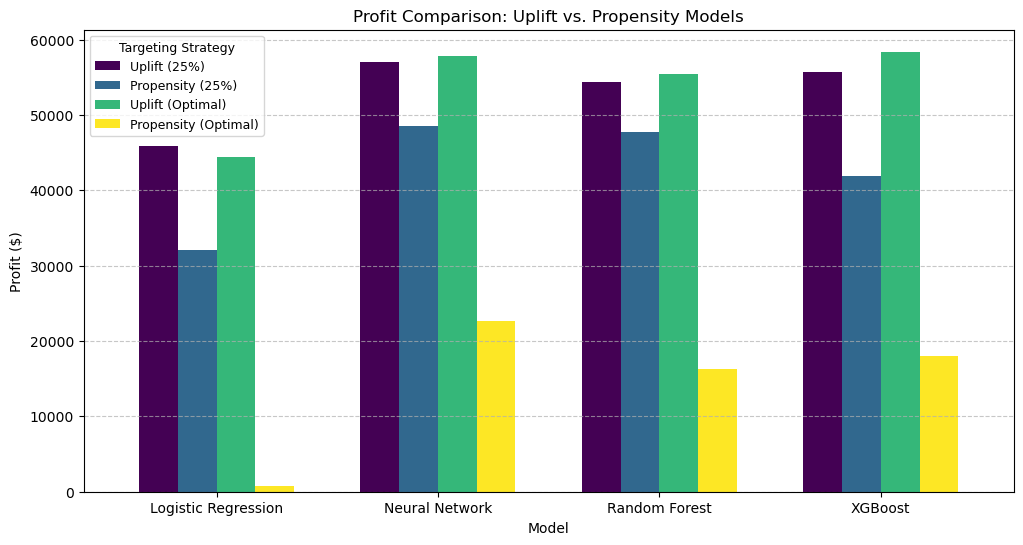

In [197]:
# visualize the profits of the uplift and propensity models
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Neural Network", "Random Forest", "XGBoost"]

uplift_profits_25 = [
    profit_scaled_uplift_logit,  
    profit_scaled_uplift_nn,    
    profit_scaled_uplift_rf,    
    profit_scaled_uplift_xgb    
]

propensity_profits_25 = [
    profit_scaled_prop_logit, 
    profit_scaled_prop_nn,    
    profit_scaled_prop_rf,     
    profit_scaled_prop_xgb     
]

uplift_profits_optimal = [
    p2_profit_scaled_uplift_logit,  
    p2_profit_scaled_uplift_nn,     
    p2_profit_scaled_uplift_rf,   
    p2_profit_scaled_uplift_xgb  
]

propensity_profits_optimal = [
    p2_profit_scaled_prop_logit,  
    p2_profit_scaled_prop_nn,    
    p2_profit_scaled_prop_rf,    
    p2_profit_scaled_prop_xgb    
]


df_profits = pd.DataFrame({
    "Model": models,
    "Uplift (25%)": uplift_profits_25,
    "Propensity (25%)": propensity_profits_25,
    "Uplift (Optimal)": uplift_profits_optimal,
    "Propensity (Optimal)": propensity_profits_optimal
})

fig, ax = plt.subplots(figsize=(12, 6))
df_profits.set_index("Model").plot(kind="bar", ax=ax, width=0.7, colormap="viridis")

ax.set_ylabel("Profit ($)")
ax.set_title("Profit Comparison: Uplift vs. Propensity Models")
ax.legend(title="Targeting Strategy", loc="upper left", fontsize=9, title_fontsize=9)

plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### 7. Give two reasons why one approach (i.e., propensity-to-buy vs uplift) performs better than the other on incremental profit when the optimal percentage of customers is selected for each approach

1. Uplift Models Capture the True Impact of Targeting
- Propensity-to-buy models predict who is likely to convert, but they do not consider whether the ad actually influences their decision.
- Uplift models measure the incremental effect of the ad by comparing the treatment and control groups, ensuring that only customers who benefit from targeting are selected.
- Result: The propensity model over-targets customers who would have purchased regardless of the ad, leading to higher costs and lower incremental profit.
2. Propensity-to-Buy Models Include "Sure Things" and "Lost Causes"
- Sure Things: Customers who would have converted even without an ad. Targeting them wastes money because they don't provide incremental revenue.
- Lost Causes: Customers who are unlikely to convert regardless of being targeted. Advertising to them adds cost without increasing revenue.
- Uplift models avoid these segments and focus on the Persuadables—customers who are more likely to convert because of the ad.
- Result: The uplift model optimizes ad spend by targeting only those who generate true incremental conversions, leading to higher profitability.


### Part III: Generative AI

1. **Specific Examples of Prompts We Used**  

Prompt 1: "Why are we using the uplift column instead of inc_uplift or incremental_resp?"  
AI Response: Helped us work through the distinction between uplift and incremental response, refining our understanding of how each metric impacts targeting decisions. 
How It Helped: Made us rethink how we were segmenting customers and ensured we were interpreting the right metric for our uplift modeling approach.  

Prompt 2: "Why does our uplift model show negative uplift in the lower quantiles?"  
AI Response: Walked us through possible explanations, like customers who would have converted anyway, ad fatigue, and model misallocation of treatment effects. 
How It Helped: Forced us to take a deeper look at how our model was distinguishing persuadable customers from those who weren’t influenced by the ad, or were even negatively impacted.  

Prompt 3: "How do we balance targeting efficiency with maximizing incremental profit?"  
AI Response: Outlined different ways to optimize ad spend, such as setting profitability thresholds, prioritizing high-uplift bins, and knowing when additional targeting becomes inefficient. 
How It Helped: Gave us a good framework to structure our ad spend allocation, but we had to adjust AI’s recommendations based on the specifics of our dataset.  

Prompt 4: "How should we approach model selection when different uplift models provide similar overall results but behave differently in specific segments?"  
AI Response: Suggested we look beyond overall uplift and evaluate model performance across key customer segments. 
How It Helped: Encouraged us to dig deeper into model behavior at a segment level instead of just relying on overall uplift scores, helping us make a more informed selection.  

2. **How the AI Responses Helped or Hindered Our Understanding**  

Helped us break down complex uplift modeling concepts into more understandable components, particularly uplift_score and incremental_resp.  
Guided us through debugging our profit calculations by helping us identify potential errors and refine our approach step by step.  
Pushed us to compare different uplift distributions and better understand the implications of negative uplift zones.   
Some initial responses were too general or high-level, requiring multiple follow-ups to get the level of detail we needed.  
AI couldn’t directly analyze our dataset, so we had to manually test and validate its recommendations to make sure they applied correctly.  

3. **Limitations or Challenges We Encountered**  

Interpreting Model Performance: AI provided helpful explanations of individual models but didn’t compare them directly. We had to figure out how to balance uplift magnitude, profit impact, and other factors when selecting the best-performing model.  
Scaling Factors in Profit Calculation: Initially, AI suggested summing bins for cumulative uplift, but after further discussion, we realized incremental_resp was already cumulative. This meant we had to rethink our methodology to avoid double-counting and misinterpreting the results.  
Handling Complex Data Interactions: Some of AI’s recommendations made sense in theory but didn’t align with our dataset’s structure. We had to make manual adjustments and push back on some of its suggestions to ensure they worked correctly.  

4. **Key Insights Gained from Using GenAI Tools**  

Uplift modeling becomes less effective beyond targeting around 80% of the population, making additional ad spend inefficient.  
Negative uplift segments should be carefully considered since targeting them can lead to wasted spend or even reduce conversions.  
Scaling factors between test data and full datasets need to be carefully applied to avoid introducing biases.  
AI reinforced the importance of balancing uplift-driven targeting with broader business constraints to maximize overall profitability.  

5. **Questions That Arose During Interactions**  

Why do some models, like XGBoost and Neural Networks, show similar uplift results but behave differently in low-performing segments?  
Would adjusting uplift thresholds improve cost efficiency and lead to better targeting decisions?  
How can we better evaluate model performance when uplift scores are similar, but segment-level behavior varies?  
What adjustments can be made when uplift distributions suggest diminishing returns in certain customer segments?  
How do we ensure that scaling adjustments from test data to full population are applied correctly without introducing biases?  

6. **How GenAI Complemented Our Learning Process**  

Acted as a collaborative troubleshooting tool, helping us refine our profit calculations and interpret uplift metrics more effectively.  
Encouraged us to question and validate AI’s responses rather than taking them at face value.  
Walked us through graph interpretations, helping us analyze and compare uplift distributions across different models.  
Served as a helpful reference for conceptual clarifications, but we had to manually verify and adjust its recommendations for our specific dataset.  



